In [24]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

C:\Users\Private\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        t

In [25]:
import pandas as pd
df = pd.DataFrame(boston.data, columns=boston.feature_names)

In [26]:
corr_matrix = df.corr().round(3)
print(corr_matrix)

          CRIM     ZN  INDUS   CHAS    NOX     RM    AGE    DIS    RAD    TAX  \
CRIM     1.000 -0.200  0.407 -0.056  0.421 -0.219  0.353 -0.380  0.626  0.583   
ZN      -0.200  1.000 -0.534 -0.043 -0.517  0.312 -0.570  0.664 -0.312 -0.315   
INDUS    0.407 -0.534  1.000  0.063  0.764 -0.392  0.645 -0.708  0.595  0.721   
CHAS    -0.056 -0.043  0.063  1.000  0.091  0.091  0.087 -0.099 -0.007 -0.036   
NOX      0.421 -0.517  0.764  0.091  1.000 -0.302  0.731 -0.769  0.611  0.668   
RM      -0.219  0.312 -0.392  0.091 -0.302  1.000 -0.240  0.205 -0.210 -0.292   
AGE      0.353 -0.570  0.645  0.087  0.731 -0.240  1.000 -0.748  0.456  0.506   
DIS     -0.380  0.664 -0.708 -0.099 -0.769  0.205 -0.748  1.000 -0.495 -0.534   
RAD      0.626 -0.312  0.595 -0.007  0.611 -0.210  0.456 -0.495  1.000  0.910   
TAX      0.583 -0.315  0.721 -0.036  0.668 -0.292  0.506 -0.534  0.910  1.000   
PTRATIO  0.290 -0.392  0.383 -0.122  0.189 -0.356  0.262 -0.232  0.465  0.461   
B       -0.385  0.176 -0.357

In [27]:
df['MEDV'] = boston.target

In [28]:
min_corr = corr_matrix.min().idxmin()
max_corr = corr_matrix.max().idxmax()
x = df[[min_corr, max_corr]]

In [29]:
from sklearn.model_selection import train_test_split
y = df['MEDV']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [30]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)

In [31]:
from sklearn.metrics import mean_squared_error,r2_score
import math

mse_list=[]
rmse_list=[]
r2_list=[]

mse=mean_squared_error(y_test,y_pred)
mse_list.append(mse)

rmse=math.sqrt(mse)
rmse_list.append(rmse)

r2=r2_score(y_test,y_pred)
r2_list.append(r2)

print("Mean Squared Error:", mse_list)
print("Root Mean Squared Error:", rmse_list)
print("R2 Score:", r2_list)

Mean Squared Error: [81.30565789473684]
Root Mean Squared Error: [9.016965004630817]
R2 Score: [0.14855696071074687]


In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)

mse=mean_squared_error(y_test,y_pred)
mse_list.append(mse)

rmse=math.sqrt(mse)
rmse_list.append(rmse)

r2=r2_score(y_test,y_pred)
r2_list.append(r2)

print("Mean Squared Error:", mse_list)
print("Root Mean Squared Error:", rmse_list)
print("R2 Score:", r2_list)

Mean Squared Error: [81.30565789473684, 76.32655172413793]
Root Mean Squared Error: [9.016965004630817, 8.736506837640427]
R2 Score: [0.14855696071074687, 0.07870157420154689]


In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)

mse=mean_squared_error(y_test,y_pred)
mse_list.append(mse)

rmse=math.sqrt(mse)
rmse_list.append(rmse)

r2=r2_score(y_test,y_pred)
r2_list.append(r2)

print("Mean Squared Error:", mse_list)
print("Root Mean Squared Error:", rmse_list)
print("R2 Score:", r2_list)

Mean Squared Error: [81.30565789473684, 76.32655172413793, 63.90460784313724]
Root Mean Squared Error: [9.016965004630817, 8.736506837640427, 7.994035766941329]
R2 Score: [0.14855696071074687, 0.07870157420154689, 0.06834252577546052]


In [34]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)

mse=mean_squared_error(y_test,y_pred)
mse_list.append(mse)

rmse=math.sqrt(mse)
rmse_list.append(rmse)

r2=r2_score(y_test,y_pred)
r2_list.append(r2)

print("Mean Squared Error:", mse_list)
print("Root Mean Squared Error:", rmse_list)
print("R2 Score:", r2_list)

Mean Squared Error: [81.30565789473684, 76.32655172413793, 63.90460784313724, 40.187261480392195]
Root Mean Squared Error: [9.016965004630817, 8.736506837640427, 7.994035766941329, 6.339342353934846]
R2 Score: [0.14855696071074687, 0.07870157420154689, 0.06834252577546052, 0.4141148222249187]


In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)

mse=mean_squared_error(y_test,y_pred)
mse_list.append(mse)

rmse=math.sqrt(mse)
rmse_list.append(rmse)

r2=r2_score(y_test,y_pred)
r2_list.append(r2)

print("Mean Squared Error:", mse_list)
print("Root Mean Squared Error:", rmse_list)
print("R2 Score:", r2_list)

Mean Squared Error: [81.30565789473684, 76.32655172413793, 63.90460784313724, 40.187261480392195, 50.41591940196076]
Root Mean Squared Error: [9.016965004630817, 8.736506837640427, 7.994035766941329, 6.339342353934846, 7.100416847056288]
R2 Score: [0.14855696071074687, 0.07870157420154689, 0.06834252577546052, 0.4141148222249187, 0.4796155189685778]


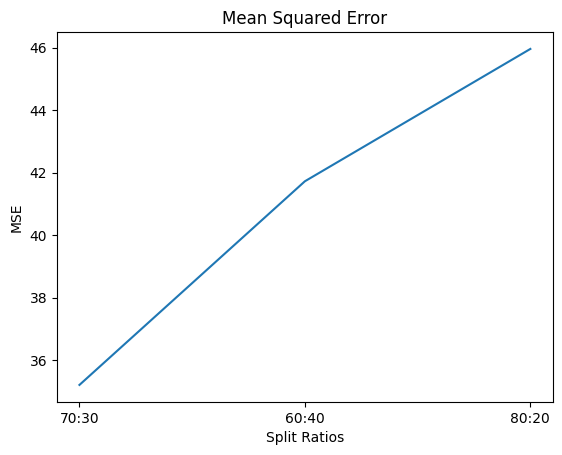

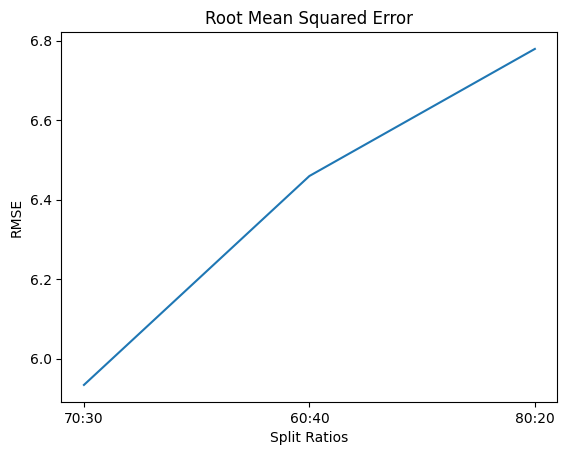

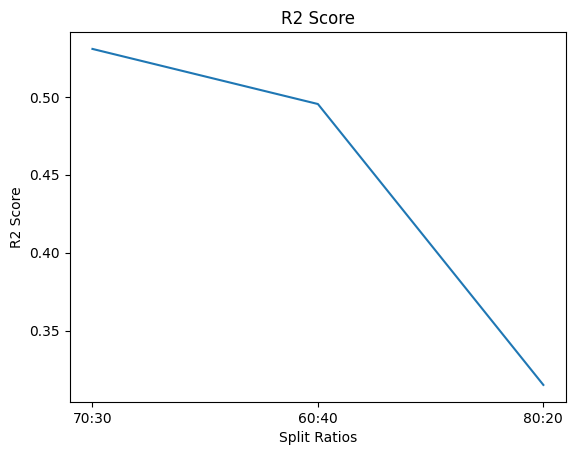

In [38]:
import matplotlib.pyplot as plt

plt.plot(['70:30', '60:40', '80:20'], mse_list)
plt.title('Mean Squared Error')
plt.xlabel('Split Ratios')
plt.ylabel('MSE')
plt.show()

plt.plot(['70:30', '60:40', '80:20'], rmse_list)
plt.title('Root Mean Squared Error')
plt.xlabel('Split Ratios')
plt.ylabel('RMSE')
plt.show()

plt.plot(['70:30', '60:40', '80:20'], r2_list)
plt.title('R2 Score')
plt.xlabel('Split Ratios')
plt.ylabel('R2 Score')
plt.show()

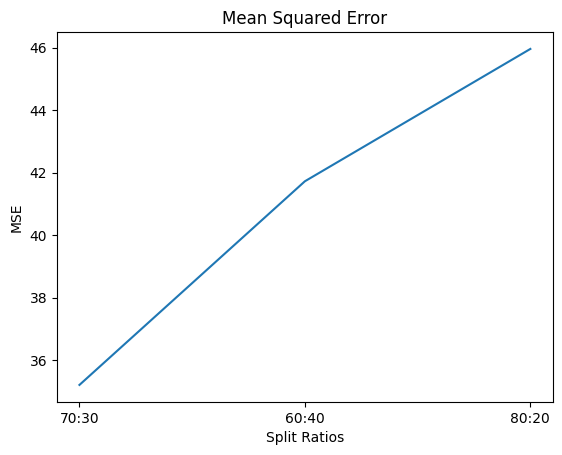

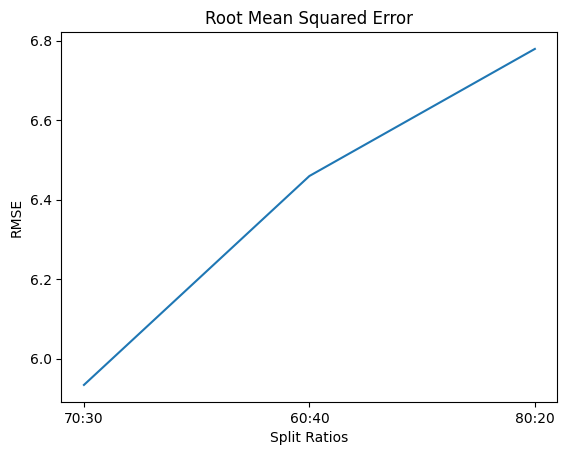

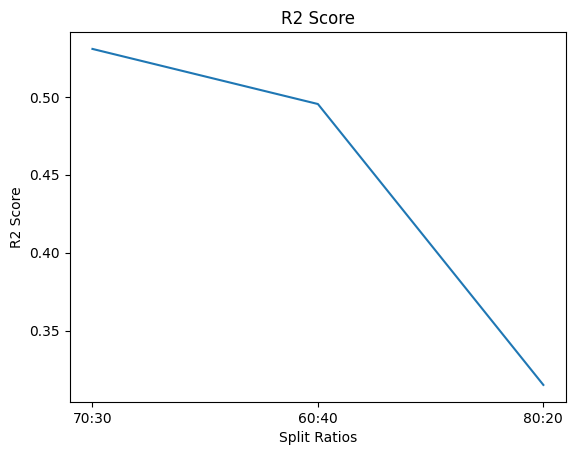

In [37]:
regressor = RandomForestRegressor(n_estimators=100, random_state=0)

mse_list=[]
rmse_list=[]
r2_list=[]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)

mse=mean_squared_error(y_test,y_pred)
mse_list.append(mse)

rmse=math.sqrt(mse)
rmse_list.append(rmse)

r2=r2_score(y_test,y_pred)
r2_list.append(r2)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)

mse=mean_squared_error(y_test,y_pred)
mse_list.append(mse)

rmse=math.sqrt(mse)
rmse_list.append(rmse)

r2=r2_score(y_test,y_pred)
r2_list.append(r2)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)

mse=mean_squared_error(y_test,y_pred)
mse_list.append(mse)

rmse=math.sqrt(mse)
rmse_list.append(rmse)

r2=r2_score(y_test,y_pred)
r2_list.append(r2)

plt.plot(['70:30', '60:40', '80:20'], mse_list)
plt.title('Mean Squared Error')
plt.xlabel('Split Ratios')
plt.ylabel('MSE')
plt.show()

plt.plot(['70:30', '60:40', '80:20'], rmse_list)
plt.title('Root Mean Squared Error')
plt.xlabel('Split Ratios')
plt.ylabel('RMSE')
plt.show()

plt.plot(['70:30', '60:40', '80:20'], r2_list)
plt.title('R2 Score')
plt.xlabel('Split Ratios')
plt.ylabel('R2 Score')
plt.show()
